Amazon Business Research Analyst Dataset

Objectives:
Analysing a Restaurant

What food customers like the most
Does weather influence what people eat
What is the preferred mode of transportation used by the restaurant
What time do people pick their orders most?
Which days are the busiest in the restaurant [which days do customers visit the restaurant the most]

Machine learning scenario:

Mrs Ndidi ordered meals at the amazon restaurant on Thursday morning. Predict how long before she received her order if the delivery man used motorcycle bearing in mind that the customer stays 9.760928 km away from the restaurant?

importing libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
restaurant=pd.read_csv('cleaned_test.csv')

In [6]:
restaurant.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Name:
0,0x2318,COIMBRES13DEL01,NaN,NaN,11.003669,76.976494,11.043669,77.016494,30-03-2022,NaN,15:05,NaN,NaN,3,Drinks,electric_scooter,1.0,No,Metropolitian,object
1,0x3474,BANGRES15DEL01,28.0,4.6,12.975377,77.696664,13.085377,77.806664,29-03-2022,20:30,20:35,Windy,Jam,0,Snack,motorcycle,1.0,No,Metropolitian,object
2,0x9420,JAPRES09DEL03,23.0,4.5,26.911378,75.789034,27.001378,75.879034,10-03-2022,19:35,19:45,Stormy,Jam,0,Drinks,motorcycle,1.0,No,Metropolitian,object
3,0x72ee,JAPRES07DEL03,21.0,4.8,26.766536,75.837333,26.856536,75.927333,02-04-2022,17:15,17:20,Fog,Medium,1,Meal,scooter,1.0,No,Metropolitian,object
4,0xa759,CHENRES19DEL01,31.0,4.6,12.986047,80.218114,13.096047,80.328114,27-03-2022,18:25,18:40,Sunny,Medium,2,Drinks,scooter,1.0,No,Metropolitian,object


In [7]:
restaurant.shape

(11399, 20)

Cleaning the data

In [8]:
#checking for null values
restaurant.isnull().sum()

ID                               0
Delivery_person_ID               0
Delivery_person_Age            491
Delivery_person_Ratings        507
Restaurant_latitude              0
Restaurant_longitude             0
Delivery_location_latitude       0
Delivery_location_longitude      0
Order_Date                       0
Time_Orderd                    444
Time_Order_picked                0
Weather                        158
Road_traffic_density           154
Vehicle_condition                0
Type_of_order                    0
Type_of_vehicle                  0
multiple_deliveries            238
Festival                        65
City                           324
Name:                            0
dtype: int64

In [9]:
#removing null values since they are few compared to the volume of the data
restaurant= restaurant.dropna()

In [10]:
restaurant.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weather                        0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Name:                          0
dtype: int64

In [11]:
restaurant.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10291 entries, 1 to 11398
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           10291 non-null  object 
 1   Delivery_person_ID           10291 non-null  object 
 2   Delivery_person_Age          10291 non-null  float64
 3   Delivery_person_Ratings      10291 non-null  float64
 4   Restaurant_latitude          10291 non-null  float64
 5   Restaurant_longitude         10291 non-null  float64
 6   Delivery_location_latitude   10291 non-null  float64
 7   Delivery_location_longitude  10291 non-null  float64
 8   Order_Date                   10291 non-null  object 
 9   Time_Orderd                  10291 non-null  object 
 10  Time_Order_picked            10291 non-null  object 
 11  Weather                      10291 non-null  object 
 12  Road_traffic_density         10291 non-null  object 
 13  Vehicle_conditio

Converting the Longitudes and Latitudes to distance_km

In [12]:
import math
from math import radians, sin, cos, acos

def distance(restaurant, destination):

    lat1, long1 = restaurant
    lat2, long2 = destination
    radius = 6371
    # distance in kilometers

    dlat = math.radians(lat2 - lat1)
    dlong = math.radians(long2 - long1)
    
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dlong / 2) * math.sin(dlong / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [13]:
restaurant['distance_km'] = restaurant.apply(lambda x: distance((x['Restaurant_latitude'], x['Restaurant_longitude']), (x['Delivery_location_latitude'], x['Delivery_location_longitude'])), axis=1)

In [14]:
restaurant.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Weather,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Name:,distance_km
1,0x3474,BANGRES15DEL01,28.0,4.6,12.975377,77.696664,13.085377,77.806664,29-03-2022,20:30,...,Windy,Jam,0,Snack,motorcycle,1.0,No,Metropolitian,object,17.076617
2,0x9420,JAPRES09DEL03,23.0,4.5,26.911378,75.789034,27.001378,75.879034,10-03-2022,19:35,...,Stormy,Jam,0,Drinks,motorcycle,1.0,No,Metropolitian,object,13.406029
3,0x72ee,JAPRES07DEL03,21.0,4.8,26.766536,75.837333,26.856536,75.927333,02-04-2022,17:15,...,Fog,Medium,1,Meal,scooter,1.0,No,Metropolitian,object,13.413644
4,0xa759,CHENRES19DEL01,31.0,4.6,12.986047,80.218114,13.096047,80.328114,27-03-2022,18:25,...,Sunny,Medium,2,Drinks,scooter,1.0,No,Metropolitian,object,17.076259
5,0xc4af,GOARES04DEL01,26.0,4.7,15.569600,73.742294,15.579600,73.752294,15-02-2022,9:45,...,Fog,Low,0,Drinks,motorcycle,1.0,No,Metropolitian,object,1.543933


Deriving a time taken column from time orderd and time order picked

In [15]:
from datetime import datetime
t1 = pd.to_datetime(restaurant['Time_Orderd'], errors='coerce', format='%H:%M')
t1

1       1900-01-01 20:30:00
2       1900-01-01 19:35:00
3       1900-01-01 17:15:00
4       1900-01-01 18:25:00
5       1900-01-01 09:45:00
                ...        
11393                   NaT
11394   1900-01-01 21:35:00
11395   1900-01-01 11:40:00
11397   1900-01-01 18:35:00
11398   1900-01-01 22:20:00
Name: Time_Orderd, Length: 10291, dtype: datetime64[ns]

In [16]:
t2 = pd.to_datetime(restaurant['Time_Order_picked'], errors='coerce', format='%H:%M')
t2

1       1900-01-01 20:35:00
2       1900-01-01 19:45:00
3       1900-01-01 17:20:00
4       1900-01-01 18:40:00
5       1900-01-01 09:55:00
                ...        
11393   1900-01-01 11:10:00
11394   1900-01-01 21:45:00
11395   1900-01-01 11:45:00
11397   1900-01-01 18:40:00
11398   1900-01-01 22:25:00
Name: Time_Order_picked, Length: 10291, dtype: datetime64[ns]

In [17]:
#converting to seconds
t3=(t2-t1).dt.seconds

In [18]:
#converting to minutes then assigning to a new column in our data
restaurant['Time_taken(min)']=t3/60

In [19]:
restaurant['Time_taken(min)']=restaurant['Time_taken(min)'].fillna(round(restaurant['Time_taken(min)'].mean()))
restaurant['Time_taken(min)'].isnull().sum()

0

In [20]:
restaurant.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Name:,distance_km,Time_taken(min)
1,0x3474,BANGRES15DEL01,28.0,4.6,12.975377,77.696664,13.085377,77.806664,29-03-2022,20:30,...,Jam,0,Snack,motorcycle,1.0,No,Metropolitian,object,17.076617,5.0
2,0x9420,JAPRES09DEL03,23.0,4.5,26.911378,75.789034,27.001378,75.879034,10-03-2022,19:35,...,Jam,0,Drinks,motorcycle,1.0,No,Metropolitian,object,13.406029,10.0
3,0x72ee,JAPRES07DEL03,21.0,4.8,26.766536,75.837333,26.856536,75.927333,02-04-2022,17:15,...,Medium,1,Meal,scooter,1.0,No,Metropolitian,object,13.413644,5.0
4,0xa759,CHENRES19DEL01,31.0,4.6,12.986047,80.218114,13.096047,80.328114,27-03-2022,18:25,...,Medium,2,Drinks,scooter,1.0,No,Metropolitian,object,17.076259,15.0
5,0xc4af,GOARES04DEL01,26.0,4.7,15.569600,73.742294,15.579600,73.752294,15-02-2022,9:45,...,Low,0,Drinks,motorcycle,1.0,No,Metropolitian,object,1.543933,10.0


Extracting days and months from OrderDatecolum

In [21]:
restaurant['Order_Date']=pd.to_datetime(restaurant['Order_Date'])
restaurant['Days']=restaurant['Order_Date'].dt.strftime('%A')
restaurant['Days']=restaurant['Days'].astype('category')

In [22]:
restaurant['Months']=restaurant['Order_Date'].dt.strftime('%m')

In [23]:
restaurant.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Name:,distance_km,Time_taken(min),Days,Months
1,0x3474,BANGRES15DEL01,28.0,4.6,12.975377,77.696664,13.085377,77.806664,2022-03-29,20:30,...,Snack,motorcycle,1.0,No,Metropolitian,object,17.076617,5.0,Tuesday,03
2,0x9420,JAPRES09DEL03,23.0,4.5,26.911378,75.789034,27.001378,75.879034,2022-10-03,19:35,...,Drinks,motorcycle,1.0,No,Metropolitian,object,13.406029,10.0,Monday,10
3,0x72ee,JAPRES07DEL03,21.0,4.8,26.766536,75.837333,26.856536,75.927333,2022-02-04,17:15,...,Meal,scooter,1.0,No,Metropolitian,object,13.413644,5.0,Friday,02
4,0xa759,CHENRES19DEL01,31.0,4.6,12.986047,80.218114,13.096047,80.328114,2022-03-27,18:25,...,Drinks,scooter,1.0,No,Metropolitian,object,17.076259,15.0,Sunday,03
5,0xc4af,GOARES04DEL01,26.0,4.7,15.569600,73.742294,15.579600,73.752294,2022-02-15,9:45,...,Drinks,motorcycle,1.0,No,Metropolitian,object,1.543933,10.0,Tuesday,02


Removing duplicate and irrelevant columns

In [24]:
restaurant_updated = restaurant.drop(['Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude','Delivery_location_longitude','Name:'], axis='columns')

Exploratory Data Analysis

In [25]:
restaurant_updated

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Order_Date,Time_Orderd,Time_Order_picked,Weather,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,distance_km,Time_taken(min),Days,Months
1,0x3474,BANGRES15DEL01,28.0,4.6,2022-03-29,20:30,20:35,Windy,Jam,0,Snack,motorcycle,1.0,No,Metropolitian,17.076617,5.0,Tuesday,03
2,0x9420,JAPRES09DEL03,23.0,4.5,2022-10-03,19:35,19:45,Stormy,Jam,0,Drinks,motorcycle,1.0,No,Metropolitian,13.406029,10.0,Monday,10
3,0x72ee,JAPRES07DEL03,21.0,4.8,2022-02-04,17:15,17:20,Fog,Medium,1,Meal,scooter,1.0,No,Metropolitian,13.413644,5.0,Friday,02
4,0xa759,CHENRES19DEL01,31.0,4.6,2022-03-27,18:25,18:40,Sunny,Medium,2,Drinks,scooter,1.0,No,Metropolitian,17.076259,15.0,Sunday,03
5,0xc4af,GOARES04DEL01,26.0,4.7,2022-02-15,9:45,9:55,Fog,Low,0,Drinks,motorcycle,1.0,No,Metropolitian,1.543933,10.0,Tuesday,02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11393,0xe240,BHPRES07DEL01,31.0,4.7,2022-02-13,10:60,11:10,Windy,Low,2,Snack,scooter,1.0,No,Metropolitian,1.572534,10.0,Sunday,02
11394,0x6909,JAPRES01DEL01,35.0,4.6,2022-03-27,21:35,21:45,Sunny,Jam,1,Snack,scooter,1.0,No,Metropolitian,16.384901,10.0,Sunday,03
11395,0x443b,JAPRES11DEL01,33.0,4.9,2022-11-03,11:40,11:45,Sandstorms,High,1,Drinks,scooter,1.0,No,Metropolitian,1.489842,5.0,Thursday,11
11397,0x22d4,VADRES03DEL02,27.0,4.7,2022-06-03,18:35,18:40,Sandstorms,Medium,0,Meal,motorcycle,0.0,No,Metropolitian,19.687777,5.0,Friday,06


In [26]:
sorted_months=restaurant_updated['Months'].sort_values()
sorted_months

8431     01
5759     01
4878     01
10468    01
4451     01
         ..
1978     12
1340     12
9832     12
9830     12
2582     12
Name: Months, Length: 10291, dtype: object

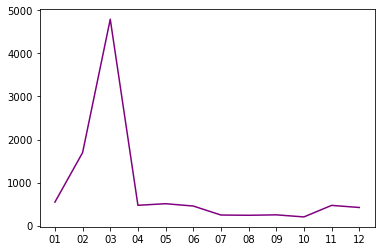

In [27]:
#df_1=restaurant_updated.groupby('Order_Date')
plt.plot(sorted_months.value_counts(sort = False), color = "purple");

This shows there was a spike in month 3(march), then a downward trend, This is worth looking into

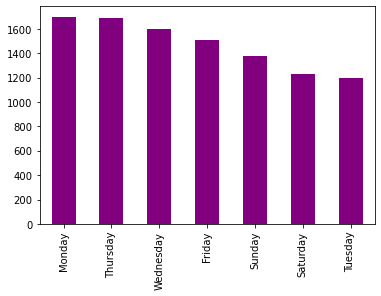

In [28]:
df=restaurant_updated['Days'].value_counts()
df.plot(kind ="bar", color = "purple");

Mondays and Thursdays seem to have more others than other days, while Tuesdays and Saturdays seem to be slow in terms of orders

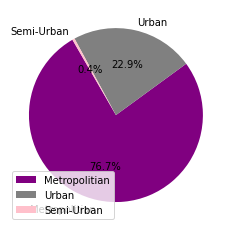

In [29]:
plt.pie(restaurant_updated['City'].value_counts(), labels=restaurant_updated['City'].value_counts().head().index, autopct='%1.1f%%',
        colors=['purple','grey', 'pink'],startangle=120);
plt.legend();

A very large percentage of customers are from Metropolitan cities while there is less patronage from semi urban probably due to the distance. More marketing and faster delivery to semi urban as well as Urban will tackle this

In [30]:
restaurant_updated['City'].value_counts()

Metropolitian    7894
Urban            2352
Semi-Urban         45
Name: City, dtype: int64

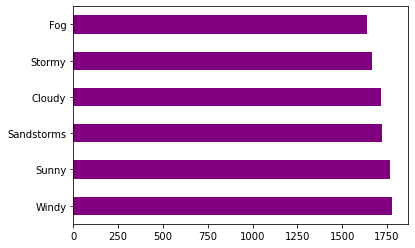

In [31]:
#does weather affect orders?
df=restaurant_updated['Weather'].value_counts()
df.plot(kind ="barh", color = "purple");

Weather seem to  have little influence on number orf orders as the difference between number of orders in different weather conditions is little

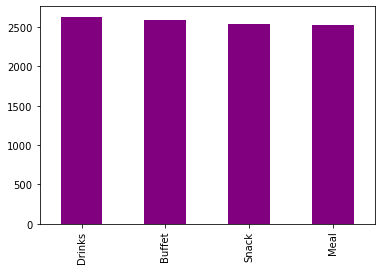

In [32]:
df=restaurant_updated['Type_of_order'].value_counts()
df.plot(kind ="bar", color = "purple");

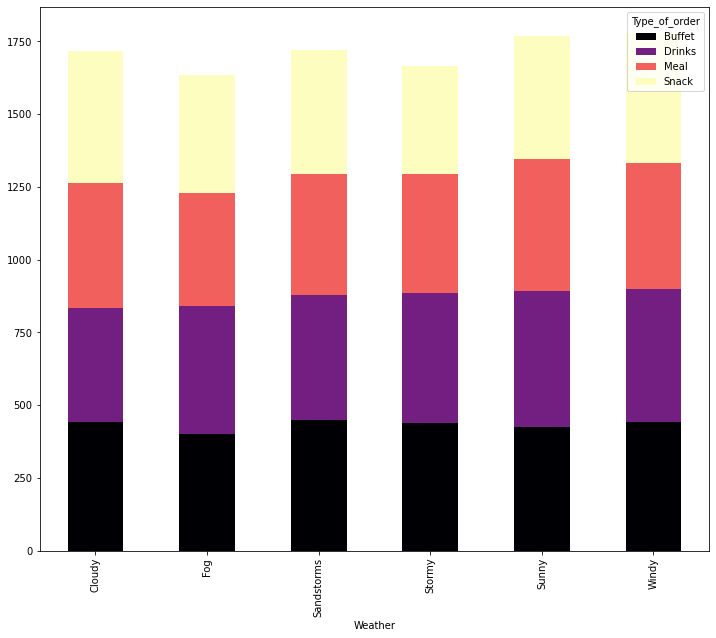

In [33]:
df=restaurant.groupby(['Type_of_order', 'Weather'])['Weather'].count().unstack('Type_of_order')
from matplotlib import cm
cmap = cm.get_cmap('magma')
df.plot(kind='bar', stacked=True, figsize=(12, 10), cmap=cmap, edgecolor='None');

Average Time Taken for Delivery

In [34]:
#On average, how long do orders take?
restaurant_updated['Time_taken(min)'].mean()

9.992712078515208

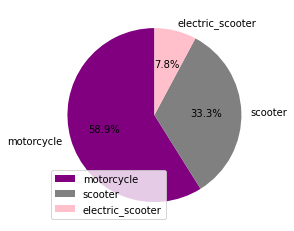

In [35]:
#What is the percentage of vehicles used by delivery persons
plt.pie(restaurant_updated['Type_of_vehicle'].value_counts(), labels=restaurant_updated['Type_of_vehicle'].value_counts().head().index, autopct='%1.1f%%',
        colors=['purple','grey', 'pink'],startangle=90)
plt.legend();

Demographics of Delivery Persons

In [36]:
#Average Age of Delivery Persons
restaurant_updated['Delivery_person_Age'].mean()

29.558449130308038

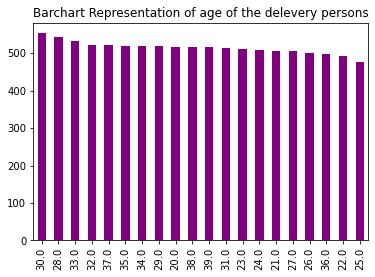

In [37]:
Age=restaurant['Delivery_person_Age'].value_counts()
Age.plot(kind='bar',fontsize=10,title="Barchart Representation of age of the delevery persons", color="purple");

Delivery persons are between the ages of 22-39, with most being 30years old

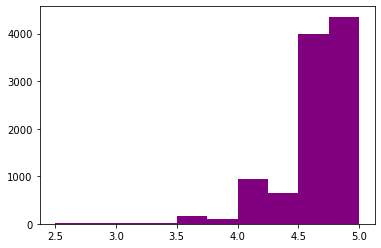

In [38]:
#Ratings Distribution
plt.hist(restaurant_updated['Delivery_person_Ratings'], color = 'purple');

What time do people order most, is it affected by traffic?

In [39]:
restaurant['Time_Orderd'].value_counts()

18:20    118
23:30    116
18:30    114
23:60    113
20:55    113
        ... 
13:35     11
13:60     11
12:35     10
13:25     10
14:60     10
Name: Time_Orderd, Length: 176, dtype: int64

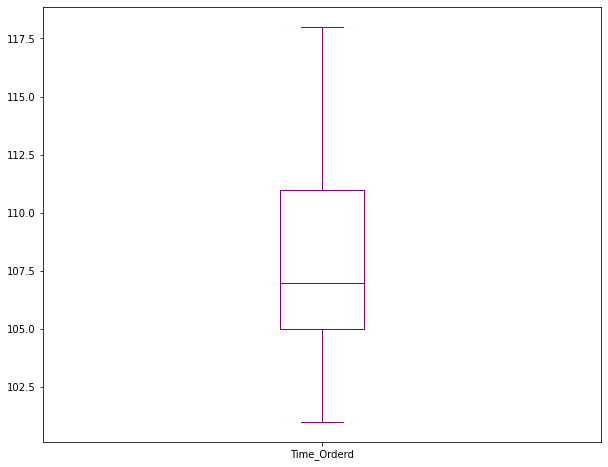

In [40]:
State_traffic_density=restaurant.groupby('Road_traffic_density')['Time_Orderd'].value_counts().sort_values(ascending=False).head(30)
State_traffic_density.plot(x='Road_traffic_density',y='Time_Orderd',kind='box',figsize=(10,8), color = 'purple');

## Machine Learnine Scenario

Feature Selection:

In [41]:
#Correlation to check for multicolinearity among our input variables
restaurant_updated.corr()

,Delivery_person_Age,Delivery_person_Ratings,Vehicle_condition,multiple_deliveries,distance_km,Time_taken(min)
Delivery_person_Age,1.000000,-0.094697,-0.005912,0.113705,0.015522,0.002316
Delivery_person_Ratings,-0.094697,1.000000,0.045664,-0.128590,-0.000464,0.008305
Vehicle_condition,-0.005912,0.045664,1.000000,-0.120895,-0.002167,-0.000489
multiple_deliveries,0.113705,-0.128590,-0.120895,1.000000,0.013035,0.006076
distance_km,0.015522,-0.000464,-0.002167,0.013035,1.000000,-0.002006
Time_taken(min),0.002316,0.008305,-0.000489,0.006076,-0.002006,1.000000


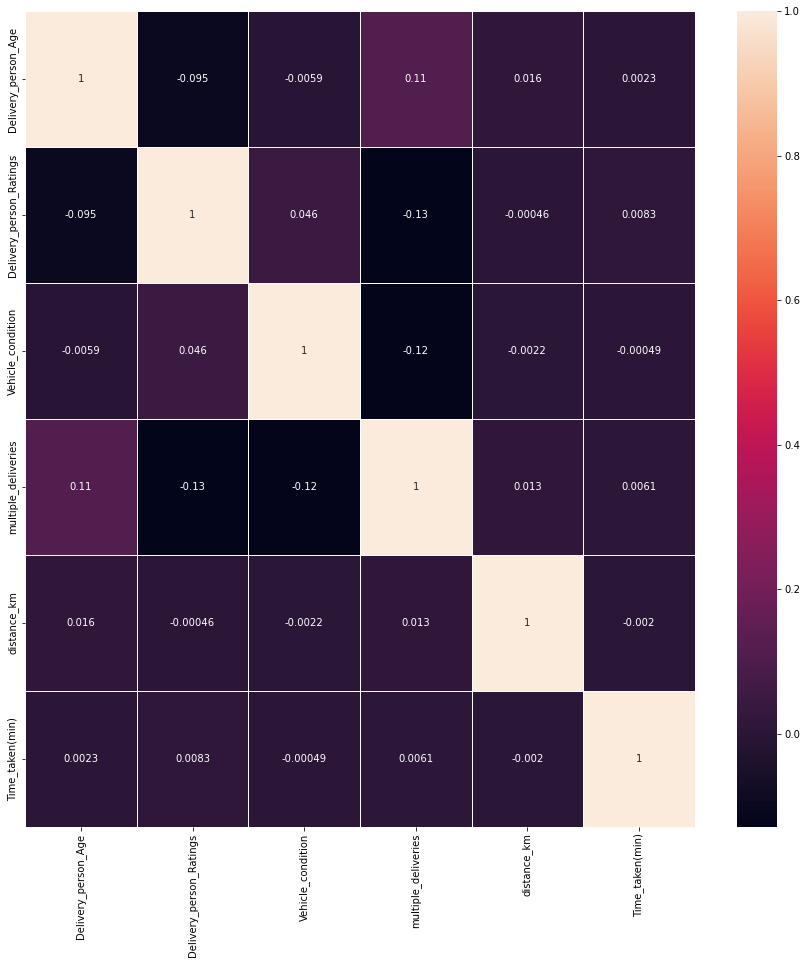

In [42]:
#Heatmap showing the correlation
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(restaurant_updated.corr(), annot=True, linewidths=.5, ax=ax);

Dropping some columns

In [43]:
restaurant_delivery=restaurant.drop(['ID','Delivery_person_ID','Festival','City','Name:','Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude','Order_Date','Time_Orderd','Time_Order_picked','Months','Days'],axis='columns')
restaurant_delivery.head()

,Delivery_person_Age,Delivery_person_Ratings,Weather,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,distance_km,Time_taken(min)
1,28.0,4.6,Windy,Jam,0,Snack,motorcycle,1.0,17.076617,5.0
2,23.0,4.5,Stormy,Jam,0,Drinks,motorcycle,1.0,13.406029,10.0
3,21.0,4.8,Fog,Medium,1,Meal,scooter,1.0,13.413644,5.0
4,31.0,4.6,Sunny,Medium,2,Drinks,scooter,1.0,17.076259,15.0
5,26.0,4.7,Fog,Low,0,Drinks,motorcycle,1.0,1.543933,10.0


Encoding the string columns using label encoder

In [44]:
from sklearn.preprocessing import LabelEncoder

le_Type_of_order=LabelEncoder()
le_Type_of_vehicle=LabelEncoder()
le_Weather=LabelEncoder()
le_Traffic=LabelEncoder()

In [45]:
restaurant_delivery['Type_of_order']=le_Type_of_order.fit_transform(restaurant_delivery['Type_of_order'])
restaurant_delivery['Type_of_vehicle']=le_Type_of_vehicle.fit_transform(restaurant_delivery['Type_of_vehicle'])
restaurant_delivery['Weather']=le_Type_of_order.fit_transform(restaurant_delivery['Weather'])
restaurant_delivery['Road_traffic_density']=le_Type_of_order.fit_transform(restaurant_delivery['Road_traffic_density'])

In [46]:
restaurant_delivery.head()

,Delivery_person_Age,Delivery_person_Ratings,Weather,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,distance_km,Time_taken(min)
1,28.0,4.6,5,1,0,3,1,1.0,17.076617,5.0
2,23.0,4.5,3,1,0,1,1,1.0,13.406029,10.0
3,21.0,4.8,1,3,1,2,2,1.0,13.413644,5.0
4,31.0,4.6,4,3,2,1,2,1.0,17.076259,15.0
5,26.0,4.7,1,2,0,1,1,1.0,1.543933,10.0


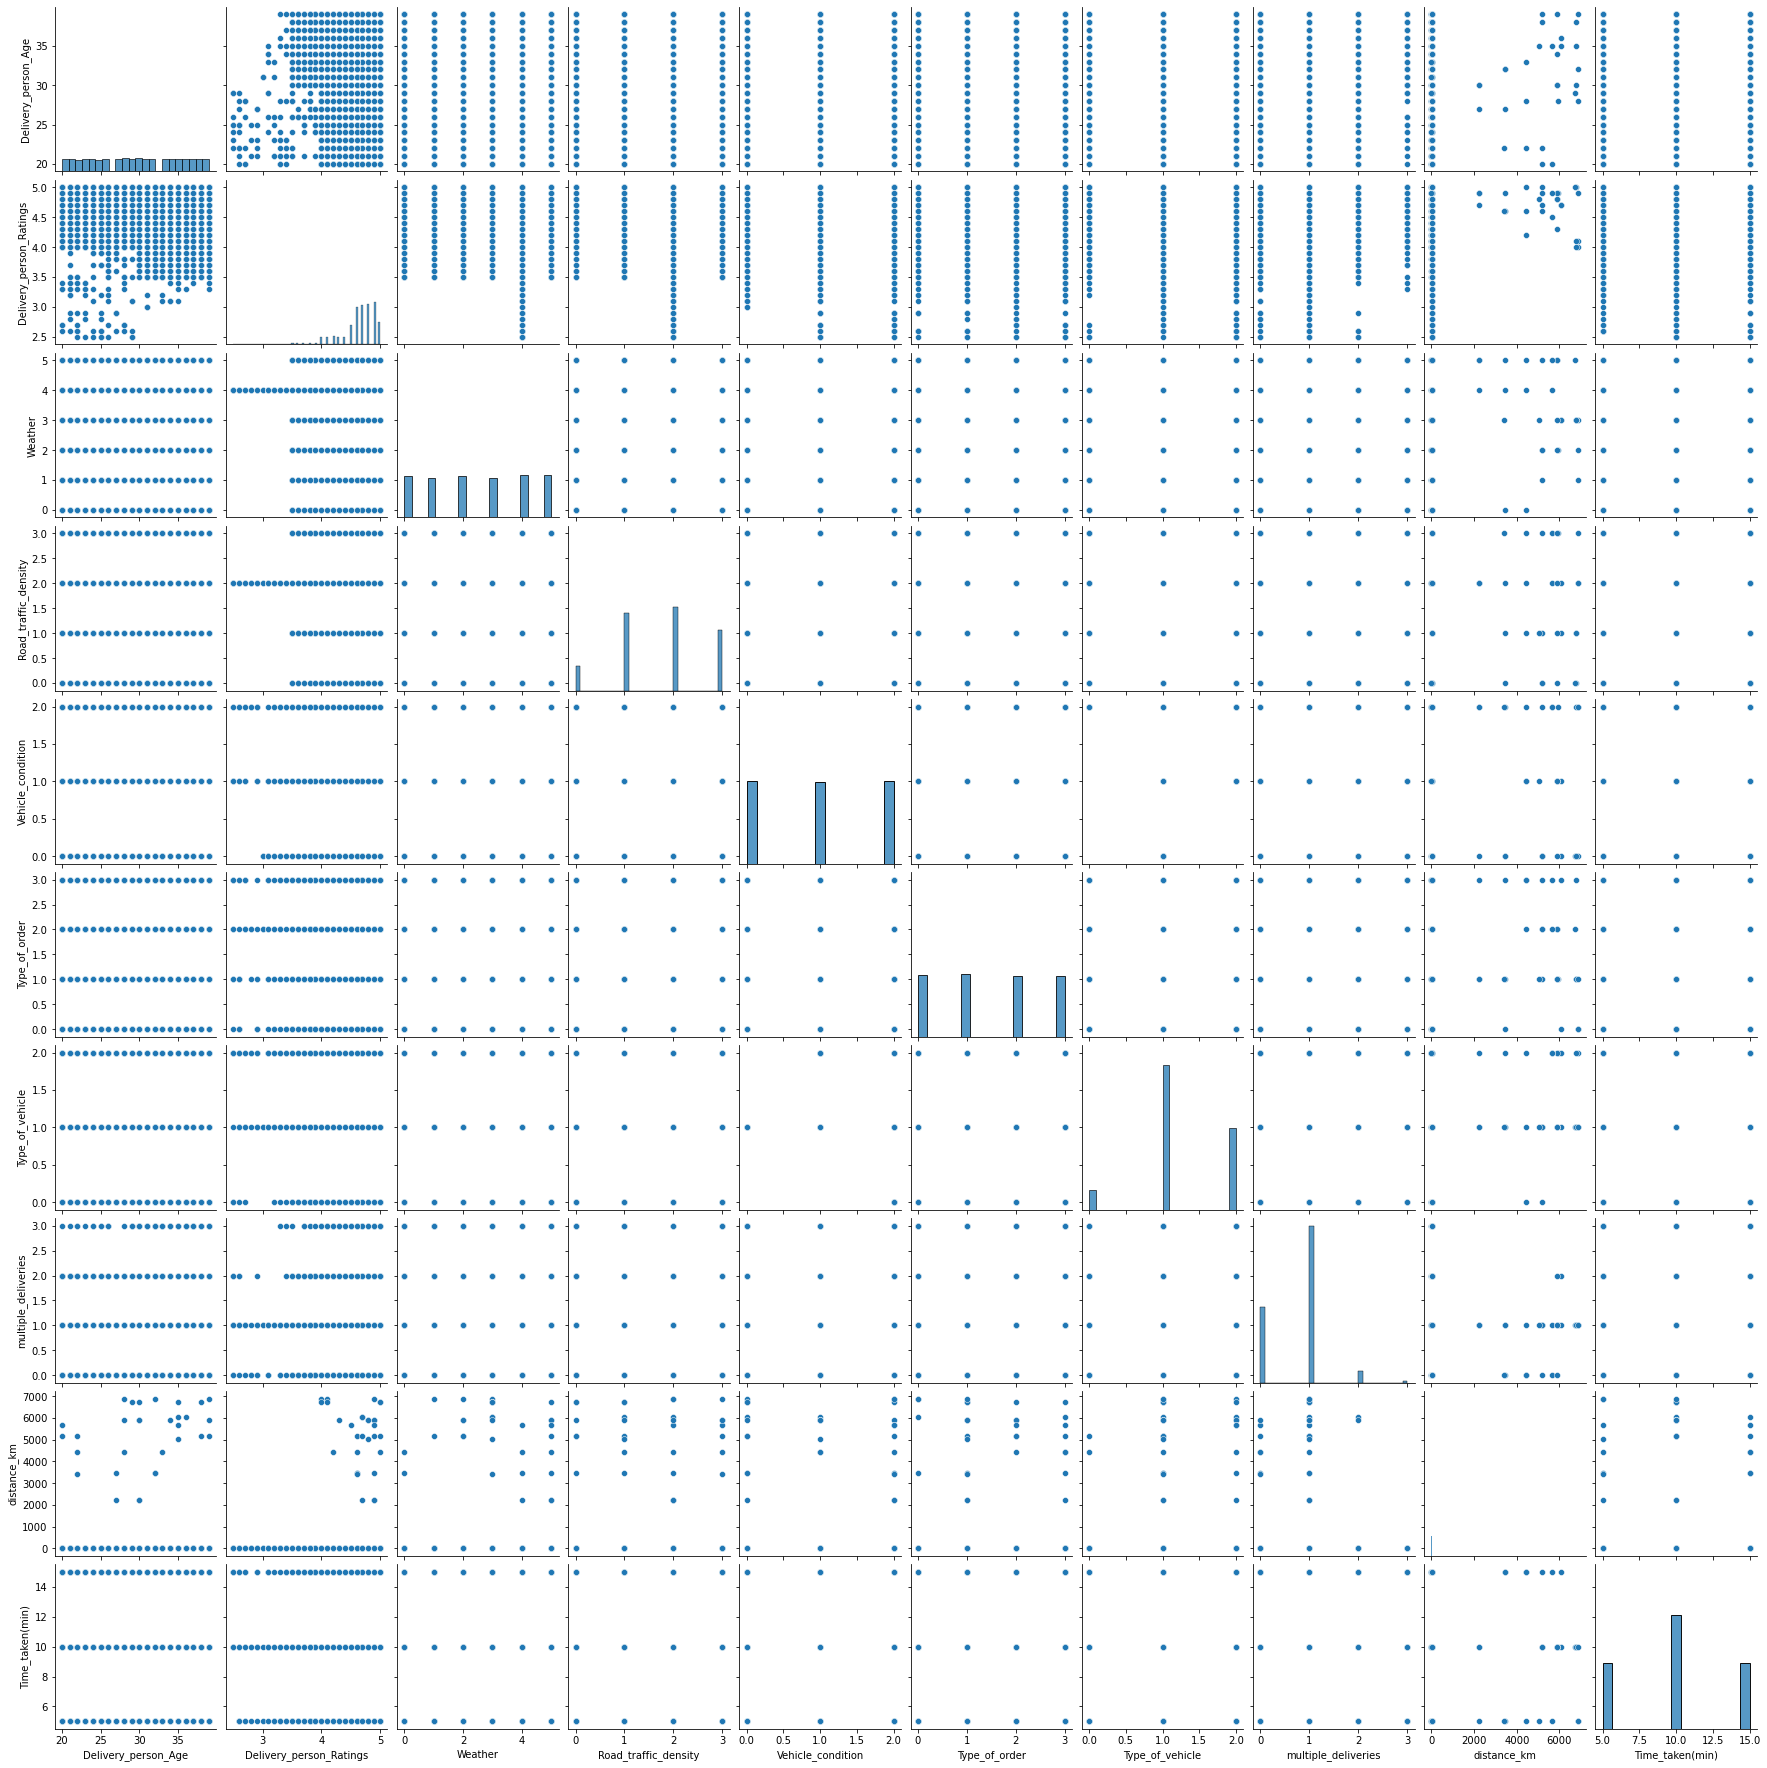

In [47]:
sns.pairplot(restaurant_delivery, kind='scatter');

The problem originally seemed to be suited for a linear regression problem, since Time_Taken(minutes) would have been presumed to be a continous variable, however, the pairplot shows something different, the relationship is not linear.

In [48]:
restaurant_delivery['Time_taken(min)'].value_counts()

10.0    4764
5.0     2771
15.0    2756
Name: Time_taken(min), dtype: int64

Probing further, I realizes that there are only 3 possible values for timetaken-5, 10, 15minutes, hence the reason for the plots. This implies a classifiction model like Decision Trees or Logistic Regression

Also, to avoid issues with fitting a continous model into a classifier, the Time_taken(mins) column will be converted to int since the decimals are .0, hence no value will be lost

In [49]:
restaurant_delivery['Time_taken(min)']=restaurant_delivery['Time_taken(min)'].astype(int)

Buliding the Model

In [50]:
x=restaurant_delivery.drop(['Time_taken(min)'], axis='columns')
y=restaurant_delivery['Time_taken(min)']

In [51]:
y.isnull().sum()

0

Splitting into test and train

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)

Multinomial Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression
logisticReg = LogisticRegression(random_state=0, multi_class='multinomial', penalty='none', solver='newton-cg').fit(x_train, y_train)

In [55]:
pred = logisticReg.predict(x_test)

Checking for the accuracy

In [56]:
logisticReg.score(x_test, y_test)

0.45798931520155417

In [57]:
from sklearn import tree
model=tree.DecisionTreeClassifier(criterion="entropy",max_depth=3)

In [58]:
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [59]:
y_pred = model.predict(x_test)

In [60]:
model.score(x_test,y_test)

0.455560951918407

Using Smote to see if there will be an increase in accuracy

In [61]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
x_smote, y_smote = sm.fit_resample(x_train, y_train)

In [62]:
model.fit(x_smote, y_smote)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [63]:
y_pred = model.predict(x_test)

In [64]:
model.score(x_test,y_test)

0.34045653229723166

The accuracy score is even lower with smote.

Trying Support Vector Machine(SVM) to see if the accuracy will increase

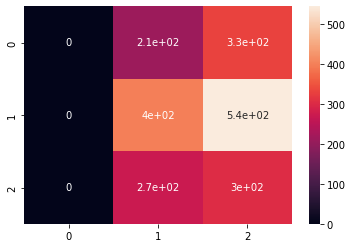

In [71]:
from sklearn.metrics import plot_confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True);

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
clf = SVC(kernel='linear')
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test,y_pred))